<h1><b> <center> House Price Prediction </b> </h1>




<a id="importing_libraries"></a>
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


import statsmodels.api as sn
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Reading the Data

In [2]:
df_house = pd.read_csv('price_data.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preliminary Investigation

In [3]:
df_house.shape

(1460, 81)

We see the dataframe has 81 columns and 1460 observations.

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The above observation gives the count of Non-Null values and their respective Datatypes of each variable

In [5]:
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('object')
df_house['YearBuilt'] = df_house['YearBuilt'].astype('str')
df_house['YearRemodAdd'] = df_house['YearRemodAdd'].astype('str')
df_house['MoSold'] = df_house['MoSold'].astype('str')
df_house['YrSold'] = df_house['YrSold'].astype('str')

The above columns consists of years, which must be Categorical for our Analysis, hence we convert these variables from Integer to String.

In [6]:
df_house.drop('Id', axis=1, inplace=True)
df_house_copy = df_house.copy()

Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

In [7]:
df_house_copy.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


<b>Inference :</b> 
1. Most of the value are in different units hence we must implement feature engineering.
2. Looking at the statistics it can be infered that most the features are skewed.



## Missing Value Investigation

In [8]:
def missing_values(df):
  missing_val_count_by_column = (df.isnull().sum()/df.shape[0])*100
  return missing_val_count_by_column[missing_val_count_by_column > 0]

In [9]:
missing_values(df_house_copy)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

<b>Inference :</b>
1. From above Analysis, we fetch the percentage of Missing values of inidvidual variable of the Dataset. 
2. We can see that PoolQC, MiscFeature, Fence, Alley has nearly 80% missing values compared to others.

To visualize the missing values, we plot a Heatmap which is shown below.

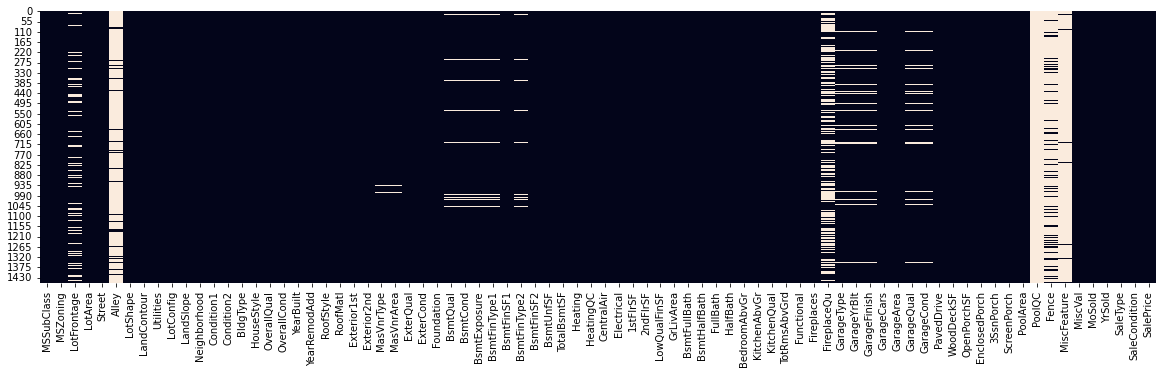

In [10]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_house_copy.isnull(), cbar=False)
plt.show()

### Dropping features with more than 80% missing data

In [11]:
df_house_copy.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)
missing_values(df_house_copy)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

<b>Inference :</b> From Above, 4 variables (<b>Alley</b>, <b>PoolQC</b>, <b>Fence</b>, <b>MiscFeature</b>) are  dropped from the Dataset as the percentage of missing values are more than 80%.

Hence we retain others, dropping these variables.

## Initial Missing Value Imputation

In [12]:
missing_value_df = missing_values(df_house_copy)

In [13]:
for col in missing_value_df.index:
  if df_house_copy[col].dtype == 'float64':
    df_house_copy[col].fillna(df_house_copy[col].mean(), inplace=True)
  if df_house_copy[col].dtype == 'object':
    df_house_copy[col].fillna(st.mode(df_house_copy[col]), inplace=True)

In [14]:
missing_values(df_house_copy)

Series([], dtype: float64)

<b>Inference :</b> For the Numerical variables, the missing values are replaced by mean of their respective columns and for Categorical variables, the missing values are replaced by the mode of their respective columns.

## Initial Encoding

In [15]:
cat_cols = [df_house_copy.columns[i] for i in range(0, df_house_copy.shape[1])  if df_house_copy.iloc[:,i].dtype=='O']

encoded = df_house_copy.loc[:,cat_cols]

label_encoder = LabelEncoder()
for col in encoded:
    encoded[col] = label_encoder.fit_transform(encoded[col])

In [16]:
df_house_copy.drop(cat_cols, axis=1, inplace=True)
pd.concat([df_house_copy, encoded])
df_house_copy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


<b>Inference :</b> The above table gives the concatenated result of both Numerical and Categorical variables.
The resultant data frame constructed after imputing the Missing Values.

## Train-test split

In [17]:
def data_split(df):
  X = df.drop('SalePrice', axis=1)
  y = df['SalePrice']

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

  return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = data_split(df_house_copy)

<b>Inference :</b> Here the resultant data frame is segregated into Test and Train.

Train dataset consists of Independent variables upon dropping the Target variable (Dependent variable) <b>'SalePrice</b>. The Train dataset is split into <b>X_train</b> and <b>Y_Train</b>.

Train dataset consists of Dependent variable <b>'SalePrice'</b>. The Test dataset is split into <b>x_Test</b> and <b>Y_Test</b>.

## Base model

In [19]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.8011608139589139

In [20]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
round(np.sqrt(mse), 4)

34804.7598

<b>Inference :</b> The Base Model is built on Regression Analysis without handling Outliers, Scaling and Normalization. From above, the train dataset gives an accuracy of <b>80.11%</b> 

In [21]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_test, y_test)

0.8188589549635098

In [22]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
round(np.sqrt(mse), 4)

34804.7598

In [23]:
test_pred = MLR_model.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
round(np.sqrt(mse), 4)

35942.839

<b>Inference :</b> Similarly we are building a Regression Base Model without handling anything and the accuracy in Test is <b>81.88%</b>.

In [24]:
X_train = sn.add_constant(X_train)
X_test = sn.add_constant(X_test)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

mlr_model = sn.OLS(y_train, X_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:25:41   Log-Likelihood:                -13872.
No. Observations:                1168   AIC:                         2.781e+04
Df Residuals:                    1137   BIC:                         2.796e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.564e+05   1.12e+05     -5.853      0.0

C:\Users\rathe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<b>Inference :</b> 

This model explains <b>79.6%</b> of the variation in dependent variable claim. 

The Durbin-Watson test statistics is <b>1.977</b> (nearly 2) and indicates that there is no autocorrelation. 

The Condition Number <b>1.33e+16</b> suggests that there is severe Multicollinearity.

# Improving the Base Model

From the above OLS Model, let us improve the Base Model for better Accuracy

## Univariate analysis of Categorical features

In [25]:
cat_cols = [df_house.columns[i] for i in range(0, df_house.shape[1])  if df_house.iloc[:,i].dtype=='O']

Let us fetch the Categorical variables from the dataset

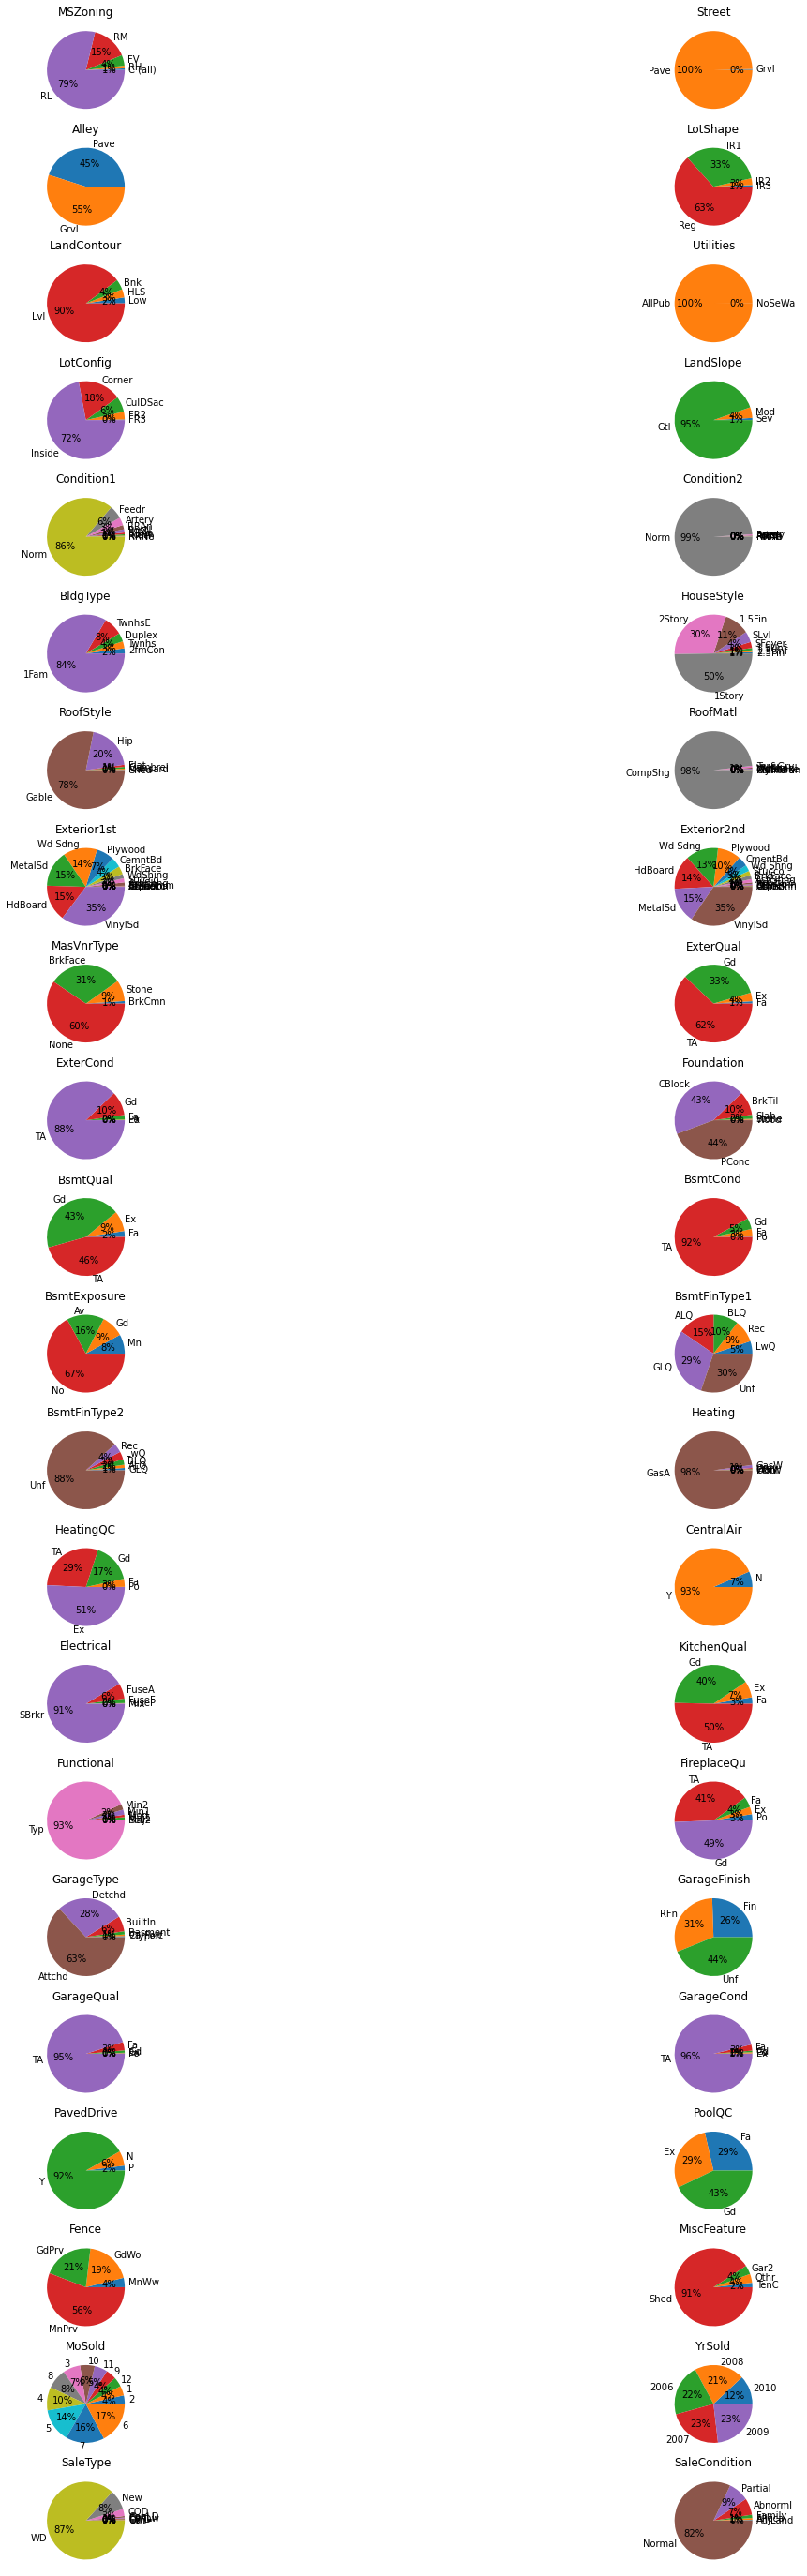

In [26]:
fig, axes = plt.subplots(22, 2, figsize=(22,50))
axes = [ax for axes_rows in axes for ax in axes_rows]

plot_cat_cols = cat_cols.copy()
plot_cat_cols.remove('Neighborhood')
plot_cat_cols.remove('YearBuilt')
plot_cat_cols.remove('YearRemodAdd')
plot_cat_cols.remove('GarageYrBlt')

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=10)
    axes[i].set_ylabel('')

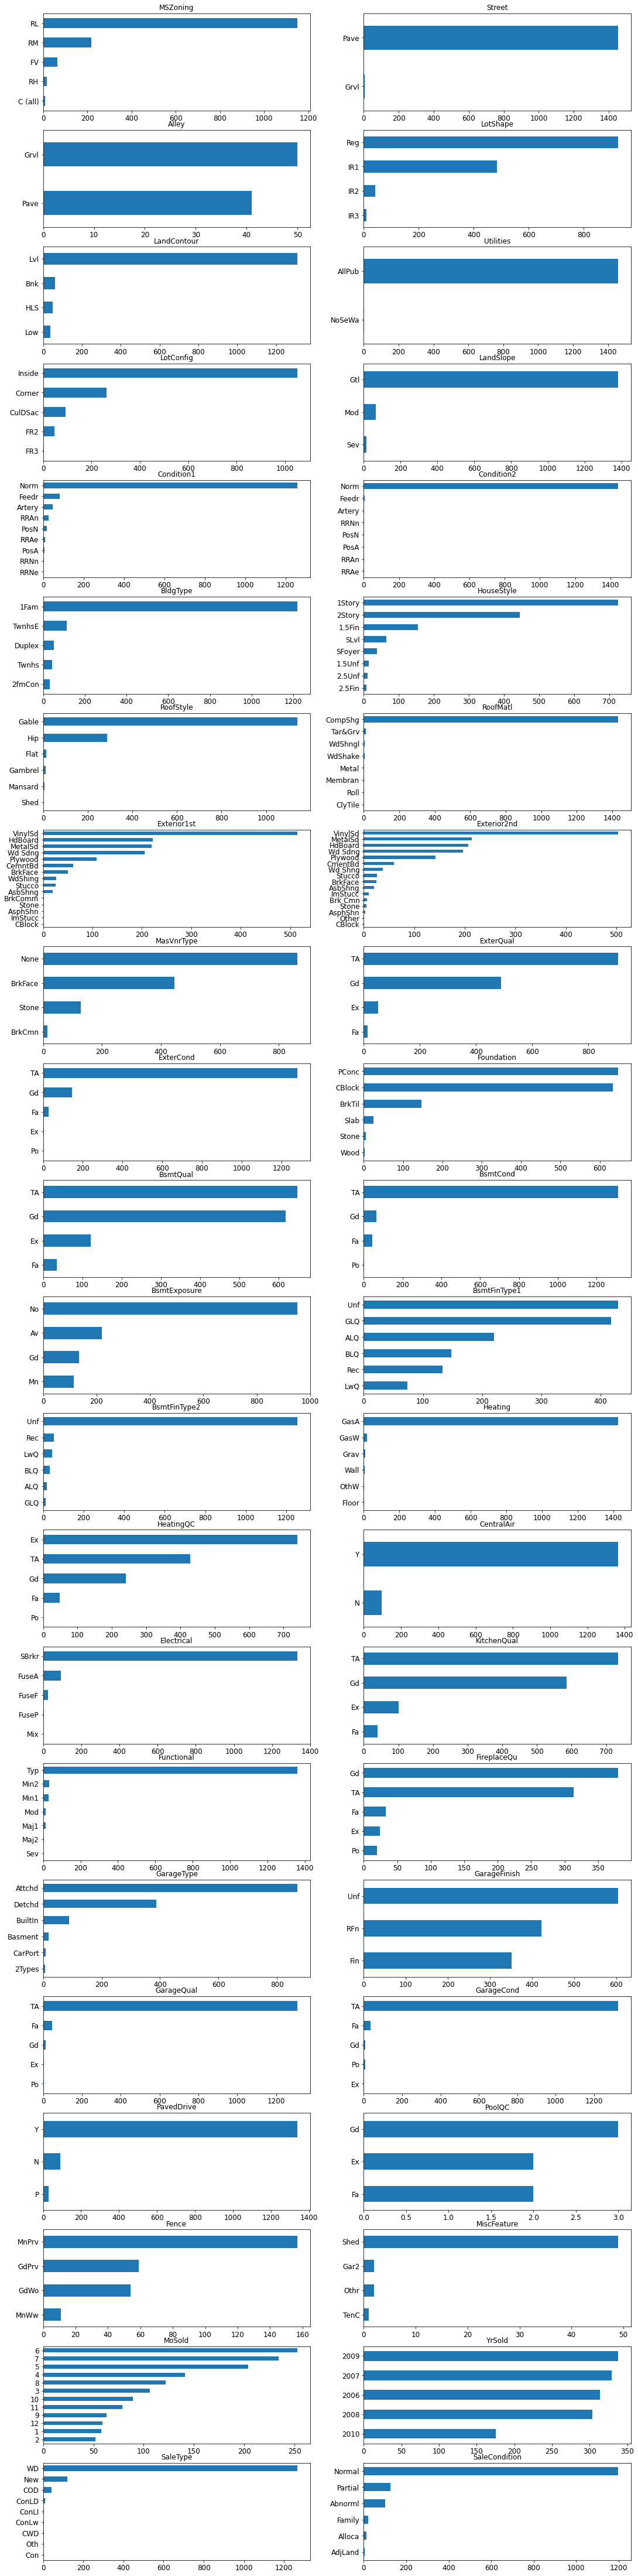

In [27]:
fig, axes = plt.subplots(22, 2, figsize=(18,80))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df_house[plot_cat_cols]):
    df_house[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

## Univariate analysis of Numerical features

In [28]:
num_cols = [c for c in df_house.columns if c not in cat_cols]

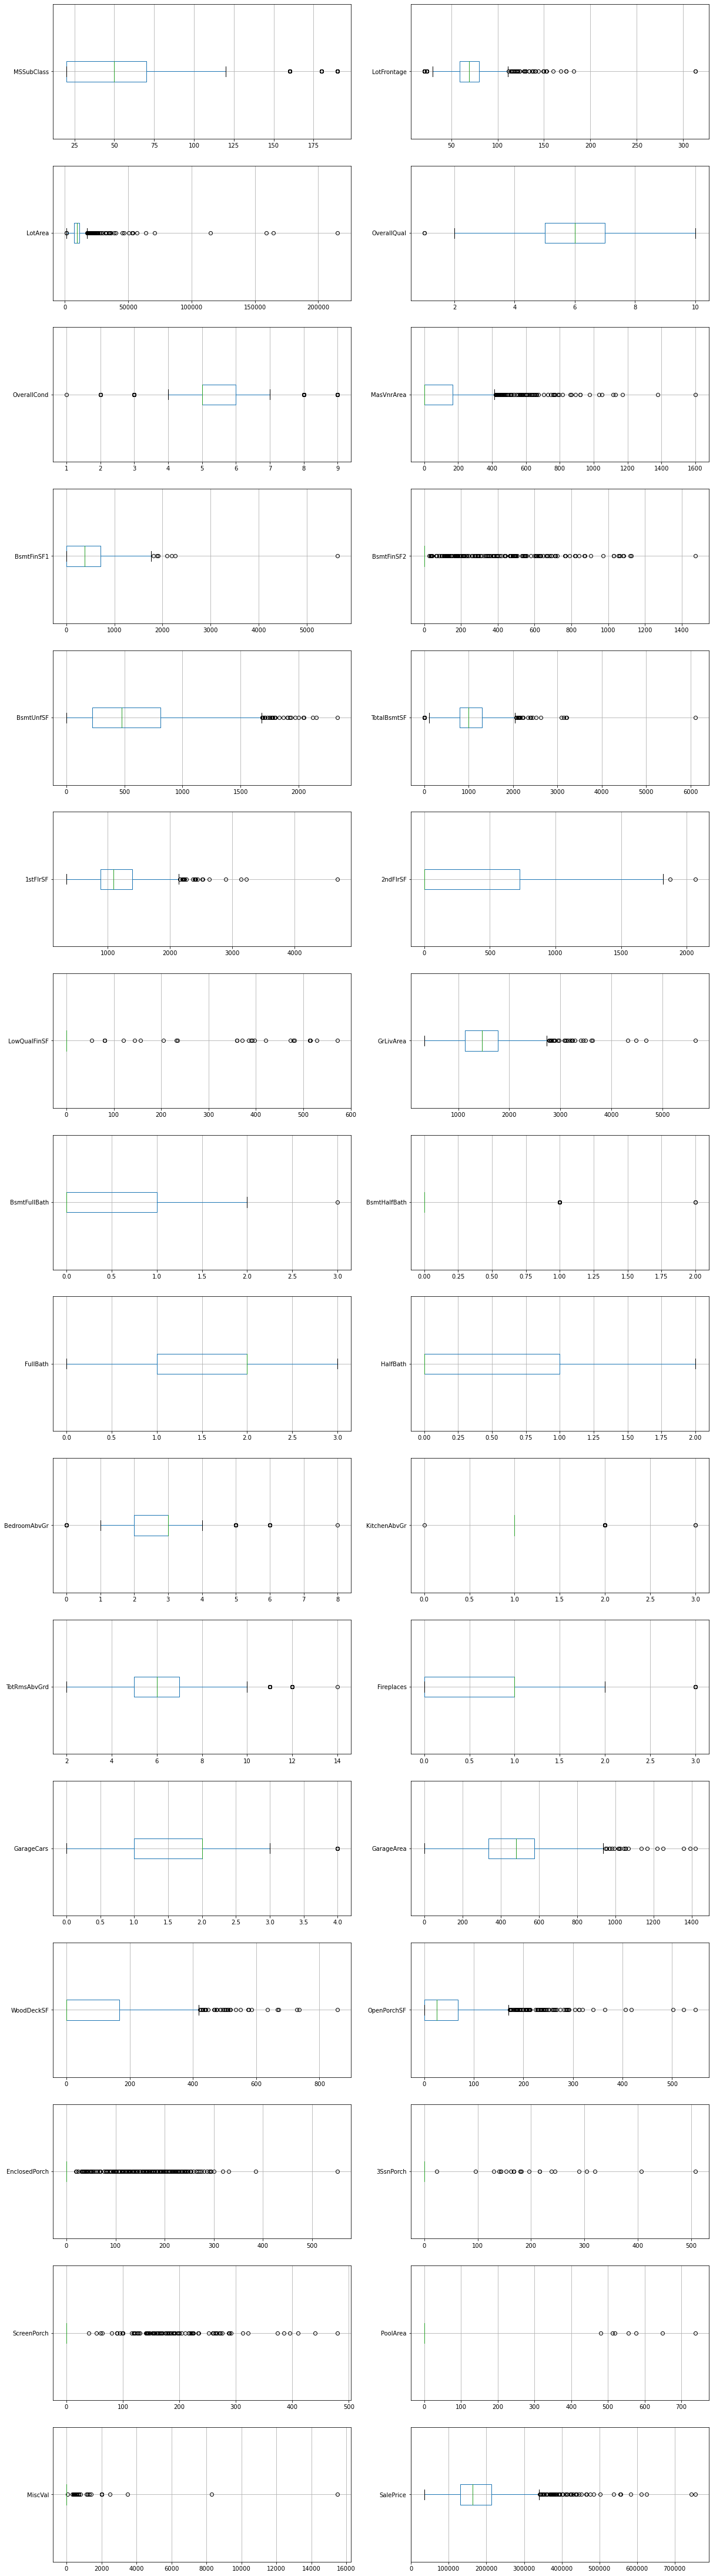

In [29]:
fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).boxplot(ax=axes.flatten()[i], vert=False)

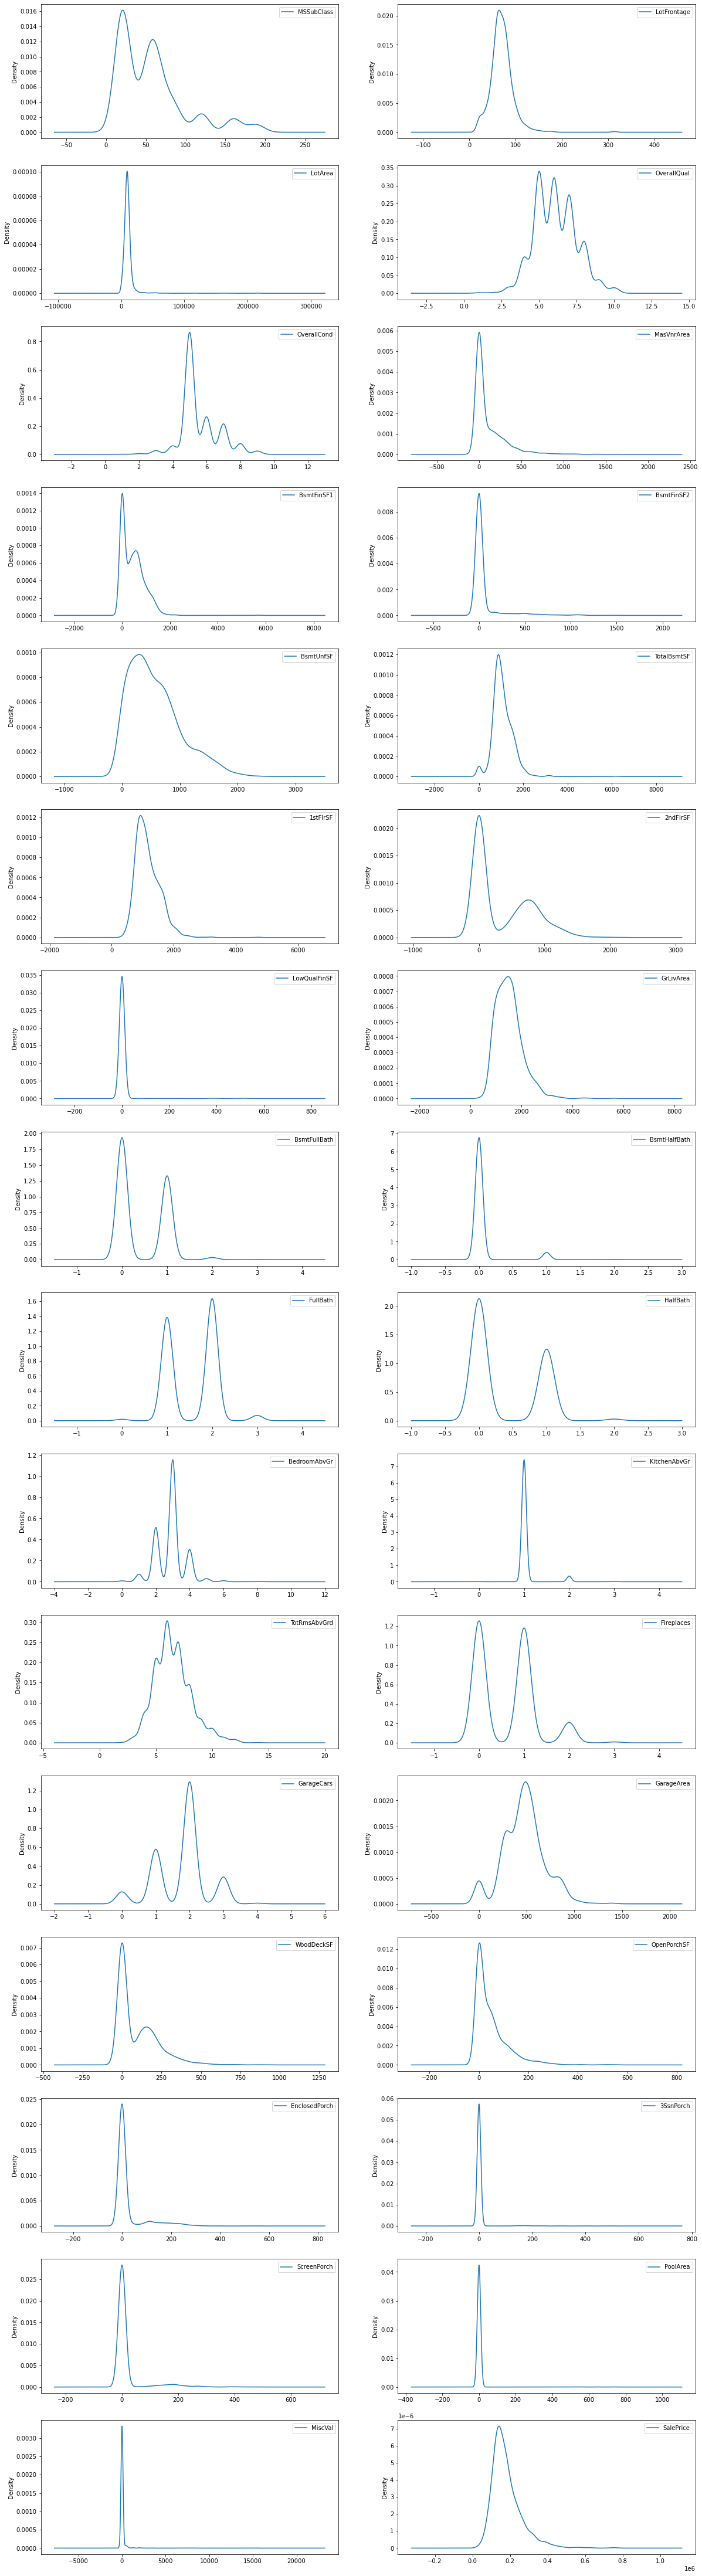

In [30]:
fig, axes = plt.subplots(16, 2, figsize=(20,80))
y =0
for i,c in enumerate(df_house[num_cols]):
    pd.DataFrame(df_house[[c]]).plot(kind='kde', ax=axes.flatten()[i])

Above are the plots on Numercial columns to check which columns are Normally DIstributed

## Imputing missing values in numerical variables

In [31]:
missing_values(df_house[num_cols])

LotFrontage    17.739726
MasVnrArea      0.547945
dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

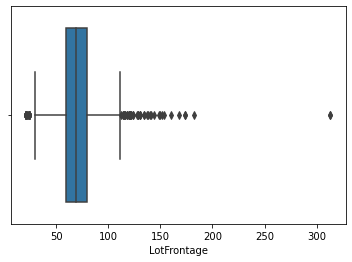

In [32]:
sns.boxplot(x = df_house['LotFrontage'])

In [33]:
df_house['LotFrontage'].fillna(df_house['LotFrontage'].median(), inplace=True)

<b>Inference :</b> From above analysis, LotFrontage has many outliers present towards the rightend of the Whiskers. Hence we impute NULL Values with its median.

<AxesSubplot:xlabel='MasVnrArea'>

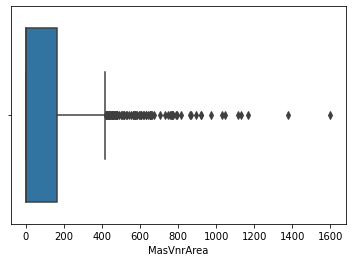

In [34]:
sns.boxplot(x = df_house['MasVnrArea'])

In [35]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].median(), inplace=True)

<b>Inference :</b> From above analysis, MasVnrArea has huge amount of Outliers, hence we impute NULL Values with Median.

In [36]:
df_house[num_cols].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

<b>Inference :</b> From above we can see that all the NULL Values are imputed on Numerical Variables and the resultant is <b>0</b>

## Imputing missing values in categorical variables

In [37]:
missing_cat = missing_values(df_house[cat_cols])
missing_cat

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [38]:
for i in missing_cat[missing_cat>0].index:
    if i == 'MasVnrType':
        df_house['MasVnrType'].fillna(st.mode(df_house['MasVnrType']), inplace=True)
    if i == 'GarageYrBlt':
        df_house['GarageYrBlt'].fillna(st.mode(df_house['GarageYrBlt']), inplace=True)
    else:
        df_house[i] = df_house[i].replace(np.nan, 'Na')
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype('str')

<b>Inference :</b>

From above, the Missing values in <b>'MasVnrType"</b> are imputed with the its respective Mode.

Also for the variable <b>GarageYrBlt</b>, the missing values are imputed with its respective Mode.

For other Categorical variables, the missing values are replaced from <b>NA</b> to <b>'Na'</b>.

The resultant Categorical variables have <b>0</b> missing values as seen below

In [39]:
df_house[cat_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

## Encoding

The categorical variables are <b>One-Hot Encoded</b> based on the Cardinality (Unique Values)

### Checking for cardinality

<b>Cardinality</b> : This indicates the number of Unique Values in each variable of our Dataset

In [40]:
object_nunique = list(map(lambda col: df_house[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('Alley', 3),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('GarageFinish', 4),
 ('PoolQC', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('BsmtExposure', 5),
 ('HeatingQC', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('YrSold', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Electrical', 6),
 ('FireplaceQu', 6),
 ('GarageQual', 6),
 ('GarageCond', 6),
 ('SaleCondition', 6),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Functional', 7),
 ('GarageType', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('MoSold', 12),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25),
 ('YearRemodAdd', 61),
 ('GarageYrBlt', 97),
 ('YearBuilt', 112)]

The above lists explains the number of Unique values in each variables.

In [41]:
low_cardinality_cols = [col for col in cat_cols if df_house[col].nunique() < 10]
high_cardinality_cols = list(set(cat_cols)-set(low_cardinality_cols))

## One-Hot encoding low cardinality categorical variables

In [42]:
OH_low_cardinal = pd.DataFrame()

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

for col in low_cardinality_cols:
    columns=[]
    for val in df_house[col].unique():
        name = ''+col+'_'+val
        columns.append(name)
    temp_df = pd.DataFrame(OH_encoder.fit_transform(df_house[[col]]), columns = columns)
    OH_low_cardinal = pd.concat([OH_low_cardinal, temp_df], axis=1)

OH_low_cardinal

,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_Na,Alley_Grvl,Alley_Pave,...,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


The above dataset is Encoded using <b>One-Hot Encoding</b> with the Cardinality Threshold less than 10.

This explains <b>Low Cardinalty</b> Encoding

## Label encoding high cardinality categorical variables

In [43]:
OH_high_cardinal = df_house.loc[:,high_cardinality_cols]

label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    OH_high_cardinal[col] = label_encoder.fit_transform(OH_high_cardinal[col])

In [44]:
df_house.drop(cat_cols, axis=1, inplace=True)
df_house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,2,548,0,61,0,0,0,0,0,208500
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,2,460,298,0,0,0,0,0,0,181500
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,2,608,0,42,0,0,0,0,0,223500
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,3,642,0,35,272,0,0,0,0,140000
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,3,836,192,84,0,0,0,0,0,250000


The above datset is Label Encoded with <b>High Cardinality</b> by replacing those NULL Values which are greater than 10 Unique values.

In [45]:
# merging one hot encoded, label encoded and numerical data
df_house = pd.concat([df_house, OH_low_cardinal], axis=1)
df_house = pd.concat([df_house, OH_high_cardinal], axis=1)

print(df_house.shape)
df_house.head()

(1460, 255)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,MoSold,YearRemodAdd,Exterior1st,Neighborhood,Exterior2nd,GarageYrBlt,YearBuilt
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0.0,1.0,0.0,4,53,12,5,13,89,104
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0.0,1.0,0.0,7,26,8,24,8,62,77
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0.0,1.0,0.0,11,52,12,5,13,87,102
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0.0,0.0,0.0,4,20,13,6,15,84,19
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0.0,1.0,0.0,3,50,12,15,13,86,101


<b>Inference :</b> Hence we get the Complete features of both Categorical and Numerical variables having all the <b>Numeric</b> data types as integer and float

## Feature Engineering

### Normalization

In [46]:
min_max = MinMaxScaler()

new_num_col = num_cols.copy()
new_num_col.remove('SalePrice')

for col in new_num_col:
    df_house[[col]] = min_max.fit_transform(df_house[[col]])

### Train-test split

In [47]:
X_train, X_test, y_train, y_test = data_split(df_house)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1168, 254)
X_test: (292, 254)
y_train: (1168,)
y_test: (292,)


### Standardization

In [48]:
def standardize(X_train, X_test):
  scaler = StandardScaler()

  X_train_scalar = scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train_scalar, columns = X_train.columns)

  X_test_scalar = scaler.fit_transform(X_test)
  X_test = pd.DataFrame(X_test_scalar, columns = X_test.columns)

  return X_train, X_test

In [49]:
X_train, X_test = standardize(X_train, X_test)

In [50]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,MoSold,YearRemodAdd,Exterior1st,Neighborhood,Exterior2nd,GarageYrBlt,YearBuilt
0,0.790872,-0.133068,-0.178830,-0.828481,1.263326,-0.587843,1.362412,-0.275999,-0.857658,0.450895,...,-0.121531,0.469554,-0.305995,1.521014,0.855995,-0.537494,-0.874654,-0.702255,1.007336,-2.229553
1,3.168272,-0.444183,0.026099,-1.558795,1.263326,-0.587843,-0.977109,-0.275999,-1.276879,-2.388707,...,-0.121531,0.469554,-0.305995,1.182754,0.710215,-0.537494,0.790539,-0.702255,1.007336,-2.229553
2,-0.873308,-0.221958,-0.179843,0.632147,-0.537241,-0.587843,-0.925312,-0.275999,1.590772,0.535726,...,-0.121531,-2.129682,3.268027,0.844493,0.953181,0.725671,-1.207692,0.733226,1.007336,1.125333
3,0.077652,0.533606,0.075432,0.632147,0.363042,1.326545,-0.068494,-0.275999,-0.416138,-0.587167,...,-0.121531,0.469554,-0.305995,-2.199852,0.175692,-0.221703,1.290096,-0.128063,0.354254,0.571950
4,0.077652,-0.355293,-0.316800,-0.098167,-0.537241,-0.587843,0.660988,-0.275999,-1.098487,-0.515730,...,-0.121531,0.469554,-0.305995,-0.170289,0.904588,0.725671,-0.708134,0.733226,0.966519,1.090747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.873308,0.355826,-0.040759,-0.098167,-0.537241,0.391873,-0.977109,-0.275999,1.095734,-0.013442,...,-0.121531,0.469554,-0.305995,1.182754,-0.553203,-1.169076,0.290981,-1.276447,-0.258011,0.053153
1164,-0.873308,0.444716,-0.063045,-0.828481,-0.537241,0.031518,-0.213096,1.515887,-0.358160,-0.031301,...,-0.121531,0.469554,-0.305995,-0.846810,-1.525064,-1.169076,-0.042058,-1.276447,-1.074364,-0.638576
1165,0.315392,-0.444183,-0.370792,-0.098167,1.263326,-0.587843,-0.977109,-0.275999,0.248372,-0.861751,...,-0.121531,0.469554,-0.305995,-0.508549,1.001774,1.041462,-0.541615,1.020322,1.007336,-1.918275
1166,2.455052,-2.177535,-0.897752,-0.098167,-2.337808,2.813011,-0.204463,-0.275999,-0.998142,-1.310462,...,-0.121531,0.469554,-0.305995,1.182754,-0.698982,-1.169076,-1.707250,-1.276447,-0.380464,-0.050606


<b>Inference :</b> The above table is fetched upon implementing the Standard Scaling on Train dataset to bring all variables to the Standardized format.

## Feature selection

In [51]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 100, forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 254 out of 254 | elapsed:    2.9s finished

[2022-03-12 19:26:33] Features: 1/100 -- score: 0.6135379597680566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 253 out of 253 | elapsed:    3.1s finished

[2022-03-12 19:26:37] Features: 2/100 -- score: 0.6899701872767537[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    3.1s finished

[2022-03-12 19:26:40] Features: 3/100 -- score: 0.7257718437182195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done 227 out of 227 | elapsed:    3.7s finished

[2022-03-12 19:28:06] Features: 28/100 -- score: 0.8597687828168828[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 226 out of 226 | elapsed:    3.8s finished

[2022-03-12 19:28:10] Features: 29/100 -- score: 0.8597202647805473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.9s finished

[2022-03-12 19:28:14] Features: 30/100 -- score: 0.8599282531461381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:    3.8s finished

[2022-03-12 19:28:18] Features: 

[Parallel(n_jobs=1)]: Done 199 out of 199 | elapsed:    5.0s finished

[2022-03-12 19:30:13] Features: 56/100 -- score: 0.8543821723831477[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:    4.7s finished

[2022-03-12 19:30:17] Features: 57/100 -- score: 0.8573924446122918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:    4.2s finished

[2022-03-12 19:30:22] Features: 58/100 -- score: 0.8569498876452994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:    4.3s finished

[2022-03-12 19:30:26] Features: 

[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:    5.7s finished

[2022-03-12 19:32:40] Features: 84/100 -- score: -602433078615955.8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    5.9s finished

[2022-03-12 19:32:46] Features: 85/100 -- score: -297685084949956.1[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:    5.9s finished

[2022-03-12 19:32:52] Features: 86/100 -- score: -227233443315687.94[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    5.9s finished

[2022-03-12 19:32:58] Features:

<b>Inference :</b> building a forward feature selection

It is evident that from for features 31 to 51, the score is constant at 0.86 and decreases form the level 52 to 0.84,

This indicates with 51 sigbificant features, the Model Efficiency can be increased.

Hence we are running the Model with 51 features using the standard Linear Regression technique as done below.

In [52]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 51, forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 254 out of 254 | elapsed:    2.4s finished

[2022-03-12 19:34:22] Features: 1/51 -- score: 0.6135379597680566[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 253 out of 253 | elapsed:    2.4s finished

[2022-03-12 19:34:25] Features: 2/51 -- score: 0.6899701872767537[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    2.7s finished

[2022-03-12 19:34:28] Features: 3/51 -- score: 0.7257718437182195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done 227 out of 227 | elapsed:    3.2s finished

[2022-03-12 19:35:42] Features: 28/51 -- score: 0.8597687828168828[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 226 out of 226 | elapsed:    3.3s finished

[2022-03-12 19:35:46] Features: 29/51 -- score: 0.8597202647805473[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    3.2s finished

[2022-03-12 19:35:49] Features: 30/51 -- score: 0.8599282531461381[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:    3.4s finished

[2022-03-12 19:35:52] Features: 31/

In [53]:
sfs_forward.k_feature_names_

('MSSubClass',
 'OverallQual',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'Fireplaces',
 'GarageCars',
 'ScreenPorch',
 'MSZoning_RH',
 'Street_Grvl',
 'Alley_Grvl',
 'LotShape_Reg',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotConfig_FR2',
 'Condition1_PosN',
 'Condition1_Artery',
 'Condition1_RRNe',
 'Condition2_Norm',
 'Condition2_Artery',
 'HouseStyle_2.5Fin',
 'RoofStyle_Mansard',
 'RoofMatl_CompShg',
 'RoofMatl_WdShngl',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'RoofMatl_ClyTile',
 'MasVnrType_BrkFace',
 'MasVnrType_BrkCmn',
 'ExterQual_Gd',
 'ExterQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_Fa',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtFinType1_LwQ',
 'Heating_OthW',
 'HeatingQC_Po',
 'CentralAir_Y',
 'KitchenQual_Gd',
 'Functional_Min1',
 'Functional_Sev',
 'FireplaceQu_Na',
 'FireplaceQu_Po',
 'GarageType_Basment',
 'GarageFinish_Na',
 'SaleType_ConLw',
 'SaleCondition_Normal',
 'SaleCondition_AdjLand',
 'SaleCondition_Family',
 'YearRemodAdd')

In [54]:
X_train, X_test, y_train, y_test = data_split(df_house)

X_train = X_train[list(sfs_forward.k_feature_names_)]
X_test = X_test[list(sfs_forward.k_feature_names_)]

X_train, X_test = standardize(X_train, X_test)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1168, 51)
X_test: (292, 51)
y_train: (1168,)
y_test: (292,)


In [55]:
X_train

,MSSubClass,OverallQual,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,ScreenPorch,MSZoning_RH,Street_Grvl,...,Functional_Sev,FireplaceQu_Na,FireplaceQu_Po,GarageType_Basment,GarageFinish_Na,SaleType_ConLw,SaleCondition_Normal,SaleCondition_AdjLand,SaleCondition_Family,YearRemodAdd
0,0.790872,-0.828481,-0.857658,0.450895,1.296312,-0.955827,-2.417038,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.855995
1,3.168272,-1.558795,-1.276879,-2.388707,-0.434975,-0.955827,-2.417038,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.710215
2,-0.873308,0.632147,1.590772,0.535726,-0.404400,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,3.304295,-0.274784,-0.121531,3.268027,0.953181
3,0.077652,0.632147,-0.416138,-0.587167,0.879733,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.175692
4,0.077652,-0.098167,-1.098487,-0.515730,0.136388,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.904588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.873308,-0.098167,1.095734,-0.013442,-0.327964,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,-0.553203
1164,-0.873308,-0.828481,-0.358160,-0.031301,-0.876395,-0.955827,-1.055195,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,-1.525064
1165,0.315392,-0.098167,0.248372,-0.861751,-0.318409,-0.955827,-2.417038,-0.279055,2.398217,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,1.001774
1166,2.455052,-0.098167,-0.998142,-1.310462,-1.021625,-0.955827,-1.055195,-0.279055,2.398217,0.050746,...,0.263813,-0.131991,-0.517868,1.724178,1.222999,-0.302636,-0.274784,-0.121531,-0.305995,-0.698982


In [56]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_train, y_train)

0.8795776397545115

<b>Inference :</b> Implementing the Linear Regression Model on Train set, the accuracy score is 88.05%.

In [57]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
MLR_model.score(X_test, y_test)

0.8679809661823783

<b>Inference :</b> Implementing the Regression Model on Test set, the accuracy score is 87.5%

In [58]:
train_pred = MLR_model.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
print('RMSE for train data',round(np.sqrt(mse), 4))

test_pred = MLR_model.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
print('RMSE for test data',round(np.sqrt(mse), 4))

RMSE for train data 27085.7721
RMSE for test data 30684.7238


<b>Inference :</b> The Root Mean Squared Error from the y_Actual and y_Predicted obtained is <b>26971.57</b> as the units of RMSE is based on the Target Variable <b>SalePrice</b>.

In [59]:
X_train = sn.add_constant(X_train)
X_test = sn.add_constant(X_test)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

mlr_model = sn.OLS(y_train, X_train).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:37:08   Log-Likelihood:                -13579.
No. Observations:                1168   AIC:                         2.726e+04
Df Residuals:                    1116   BIC:                         2.752e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.822e+05    810.791    224.729      0.0

C:\Users\rathe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<b>Inference :</b> 
1. From the above Regression OLS Model

2. R-Squared and Adj.R-Squared are <b>0.881</b> and <b>0.875</b>

3. Durbin-Watson test = <b>2.017</b> indicates that there is <b>No-Autocorrelation</b>

4. Cond.No = <b>25.8</b> indicates there is no <b>Multicollinearity</b>


## Model Validation

## K-Fold Cross Validation

In [60]:
X_train, X_test, y_train, y_test = data_split(df_house)

X_train = X_train[list(sfs_forward.k_feature_names_)]
X_test = X_test[list(sfs_forward.k_feature_names_)]

X_train, X_test = standardize(X_train, X_test)

In [61]:
X_train

,MSSubClass,OverallQual,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,GarageCars,ScreenPorch,MSZoning_RH,Street_Grvl,...,Functional_Sev,FireplaceQu_Na,FireplaceQu_Po,GarageType_Basment,GarageFinish_Na,SaleType_ConLw,SaleCondition_Normal,SaleCondition_AdjLand,SaleCondition_Family,YearRemodAdd
0,0.790872,-0.828481,-0.857658,0.450895,1.296312,-0.955827,-2.417038,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.855995
1,3.168272,-1.558795,-1.276879,-2.388707,-0.434975,-0.955827,-2.417038,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.710215
2,-0.873308,0.632147,1.590772,0.535726,-0.404400,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,3.304295,-0.274784,-0.121531,3.268027,0.953181
3,0.077652,0.632147,-0.416138,-0.587167,0.879733,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.175692
4,0.077652,-0.098167,-1.098487,-0.515730,0.136388,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,0.904588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.873308,-0.098167,1.095734,-0.013442,-0.327964,0.586170,0.306648,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,1.930996,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,-0.553203
1164,-0.873308,-0.828481,-0.358160,-0.031301,-0.876395,-0.955827,-1.055195,-0.279055,-0.416976,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,-1.525064
1165,0.315392,-0.098167,0.248372,-0.861751,-0.318409,-0.955827,-2.417038,-0.279055,2.398217,0.050746,...,0.263813,-0.131991,-0.517868,-0.579987,-0.817662,-0.302636,-0.274784,-0.121531,-0.305995,1.001774
1166,2.455052,-0.098167,-0.998142,-1.310462,-1.021625,-0.955827,-1.055195,-0.279055,2.398217,0.050746,...,0.263813,-0.131991,-0.517868,1.724178,1.222999,-0.302636,-0.274784,-0.121531,-0.305995,-0.698982


In [62]:
scores = cross_val_score(estimator = LinearRegression(), X = X_train, y = y_train, cv = 10, scoring = 'r2')

In [63]:
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.90334551 0.41012602 0.86555567 0.8738101  0.88290304 0.64866715
 0.88577928 0.87753302 0.92848251 0.88584366]

Minimum score obtained:  0.4101
Maximum score obtained:  0.9285
Average score obtained:  0.8162


<b>Inference :</b>  
From above we can see that considering 10 folds from the dataset, we get an Average Accuracy (Mean) as <b>81.78%</b> with Min as <b>42.22%</b> and Max as <b>92.62</b>.

This indicates that mean error obtained for 10 folds is <b>81.46%</b>.

## LOOCV (Leave One Out Cross Validation)

In [64]:
loocv_rmse = []

loocv = LeaveOneOut()


for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable 
    #pred = linreg.predict(X_train_l)
    mse = linreg.score(X_train_l, y_train_l)
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [65]:
print(min(loocv_rmse))
print(max(loocv_rmse))
print(np.mean(loocv_rmse))

0.9368286681420199
0.9503900493498446
0.9378622157065565


<b>Inference :</b> 

Upon implementing LOOCV, we obtain a Mean range of <b>93.84%</b>, indicates that the model can have high level of variance or estimates from each level of Folds are Highly Correlated.


**Regularization**

In [66]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [67]:
ridge.score(X_train,y_train)

0.8795748633176663

<b>Inference :</b> 

After applying the ridge regression with alpha equal to one, we get <b>88.05%</b> as the RMSE value on Train set.

In [68]:
ridge.score(X_test,y_test)

0.8680660579582687

In [69]:
ridge.fit(X_train, y_train)
train_pred = ridge.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
print('RMSE for train data',round(np.sqrt(mse), 4))

y_pred = ridge.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('RMSE for test data',round(np.sqrt(mse), 4))

RMSE for train data 27086.0843
RMSE for test data 30674.8334


**Ridge Regression using Grid Search**

In [70]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100,150,200,250]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters,
                          cv = 10)
ridge_grid.fit(X_train, y_train)

C:\Users\rathe\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.62796e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rathe\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.29431e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                    0.1, 1, 5, 10, 20, 40, 60, 80, 100, 150,
                                    200, 250]}])

In [71]:
ridge_grid.score(X_train,y_train)

0.8744367712450721

In [72]:
ridge_grid.score(X_test,y_test)

0.8565915589239566

<b>Inference :</b> From above we can conclude that by implementing Grid Regularization, we see that there is not much variations between the Test and Train Model, in which case the error's are balanced.

In [73]:
ridge.fit(X_train, y_train)
train_pred = ridge.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
print('RMSE for train data',round(np.sqrt(mse), 4))

y_pred = ridge.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('RMSE for test data',round(np.sqrt(mse), 4))

RMSE for train data 27086.0843
RMSE for test data 30674.8334
